In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Diabetes dataset

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
df = pd.DataFrame(data= load_diabetes().data,columns=load_diabetes().feature_names)

In [4]:
df['target'] = load_diabetes().target

In [5]:
X = df.drop(columns='target')
y = df['target']

In [6]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [7]:
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


## Train Test Split2

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

## Fitting Linear Regression sklearn --> OLS Method

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

print('Coeffecients: ',lr.coef_)
print('Intercept: ',lr.intercept_)

y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

print('RMSE: ',np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
print('R2 score: ',np.round(r2_score(y_test,y_pred),2))

Coeffecients:  [  -3.45774513 -244.74742301  473.42705261  367.1454326  -869.09666002
  486.12307597  183.86546993  276.74351786  777.9749957    85.3137622 ]
Intercept:  151.15225686589025
RMSE:  56.13
R2 score:  0.46


## Create Batch Gradient Descent from scratch

In [10]:
class MyBatchGD:
    
    def __init__(self,rate=0.05,epochs=100):
        self.rate = rate
        self.epochs = epochs
        self.coef = None
        self.intercept = None
        self.loss_list = None
        
    def fit(self,X,y):
        
#         initialising intercept and coeffecients
        self.intercept = 0
        self.coef = np.ones(X.shape[1])
        
        self.loss_list = []
        
        for i in range(self.epochs):
            
            y_hat = np.dot(X,self.coef) + self.intercept
            
            self.loss_list.append(np.mean(np.square(y - y_hat)))
            
#             slope calculations
            loss_slope_intercept = -2*np.mean(y - y_hat)
            loss_slope_coef = -2*(np.dot((y-y_hat),X))/X.shape[0]
        
        
#             updating intercept
            self.intercept = self.intercept - (self.rate*loss_slope_intercept)
    
#             updating coeffecients
            self.coef = self.coef - (self.rate*loss_slope_coef)
        
        
    def predict(self,X):
        return np.dot(X,self.coef) + self.intercept
    

In [11]:
model = MyBatchGD(rate = .5,epochs=1000)

In [12]:
model.fit(X_train,y_train)

In [13]:
print('Coeffeceints: ',model.coef)
print('Intercept',model.intercept)

Coeffeceints:  [   8.8553381  -192.21010665  454.03533348  347.85583213  -43.19385778
 -118.23475568 -203.56406697  138.85404639  412.4146923   127.36171603]
Intercept 151.36258888008393


In [14]:
model.loss_list

[29970.931215124,
 5854.842404273647,
 5815.232796281921,
 5776.263290159163,
 5737.9226174629475,
 5700.199735489878,
 5663.083800747247,
 5626.564165328702,
 5590.630373356027,
 5555.27215748584,
 5520.479435480023,
 5486.242306838707,
 5452.551049494689,
 5419.396116568131,
 5386.7681331804815,
 5354.6578933265,
 5323.056356803332,
 5291.9546461956215,
 5261.344043915593,
 5231.215989297137,
 5201.562075742882,
 5172.374047923326,
 5143.643799027015,
 5115.363368060919,
 5087.524937200002,
 5060.120829185156,
 5033.143504768579,
 5006.585560205739,
 4980.439724793085,
 4954.698858450651,
 4929.3559493487455,
 4904.404111577925,
 4879.83658286144,
 4855.646722309413,
 4831.82800821395,
 4808.374035884461,
 4785.278515522453,
 4762.535270135065,
 4740.138233486646,
 4718.081448087686,
 4696.359063220394,
 4674.965333000296,
 4653.894614473145,
 4633.1413657465455,
 4612.700144155627,
 4592.565604462153,
 4572.732497086466,
 4553.195666371654,
 4533.950048879357,
 4514.990671716647,
 4

In [15]:
y_pred2 = model.predict(X_test)

In [16]:
r2_score(y_test,y_pred2)

0.4589494861613699

(1432.2507154415089, 10000.0)

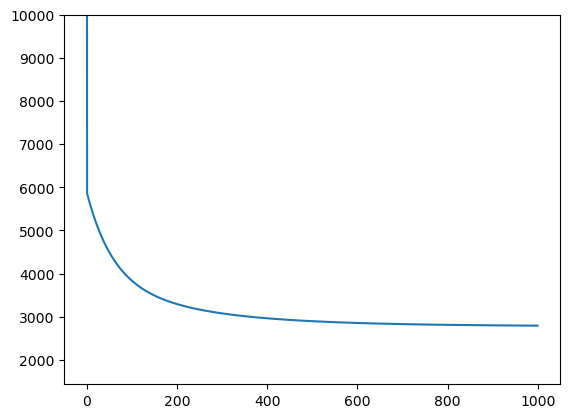

In [17]:
plt.plot(range(len(model.loss_list)),model.loss_list)
# plt.xlim([1000,2000])
plt.ylim(top = 10000)

## Effect of Learning rate on convergence of loss function

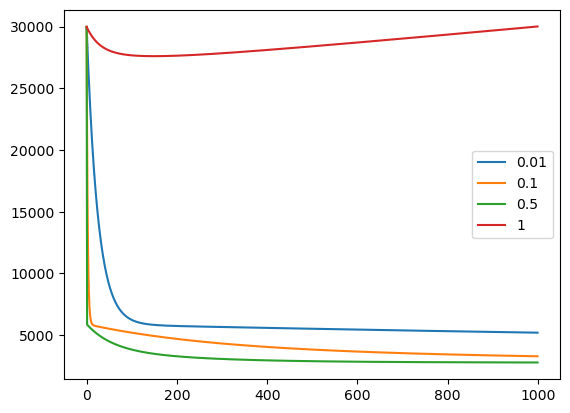

In [18]:
for l in [0.01,.1,.5,1]:
    model = MyBatchGD(rate = l,epochs = 1000)
    model.fit(X_train,y_train)
    
    plt.plot(range(len(model.loss_list)),model.loss_list,label = l)
    
plt.legend()    